<a href="https://colab.research.google.com/github/Otwooo/AI_Practice/blob/main/%EA%B3%A0%EC%96%91%EC%9D%B4_%EA%B0%95%EC%95%84%EC%A7%80_%EB%B6%84%EB%A5%98/%EA%B3%A0%EC%96%91%EC%9D%B4_%EA%B0%95%EC%95%84%EC%A7%80_%EB%B6%84%EB%A5%98(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**고양이 강아지 구분하기**
CNN을 이용하여 고양이 강아지 구분하기

### **1. 라이브러리 불러오기 & 데이터 불러오기**

In [1]:
import os
import tensorflow as tf
import shutil
import matplotlib.pyplot as plt

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/'

!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:09<00:00, 122MB/s]
100% 812M/812M [00:09<00:00, 93.2MB/s]


### **2. 데이터 전처리하기**

#### **2.1 데이터 압축풀기 & 파일 이동하기**

In [3]:
!unzip -q dogs-vs-cats.zip -d .

In [4]:
!unzip -q train.zip -d .

In [5]:
os.mkdir('/content/dataset')
os.mkdir('/content/dataset/cat')
os.mkdir('/content/dataset/dog')

for i in os.listdir('/content/train/'):
  if 'cat' in i:
    shutil.copy('/content/train/' + i, '/content/dataset/cat/' + i)
  if 'dog' in i:
    shutil.copy('/content/train/' + i, '/content/dataset/dog/' + i)

파이썬 문법으로 폴더를 안 말들어주면 오류가 발생할 수 있다.

#### **2.2 데이터 전처리**

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/dataset/',
    image_size = (64, 64),
    batch_size = 64,
    subset = 'training', 
    validation_split=0.2,
    seed = 1234
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/dataset/',
    image_size = (64, 64),
    batch_size = 64,
    subset = 'validation', 
    validation_split=0.2,
    seed = 1234
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


`train_ds = tf.keras.preprocessing.image_dataset_from_directory`
- 폴더 경로
- 이미지를 어떤 사이즈로 압축할지
- 모든 이미즈를 한번에 넣지 말고 64장 씩
- 20% 데이터를 validation으로 쪼개겠다.

In [7]:
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


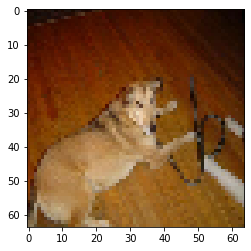

In [8]:
for i, 정답 in train_ds.take(1):
  # print(i)
  # print(정답)
  plt.imshow(i[0].numpy().astype('uint8'))
  plt.show()

In [9]:
def 전처리함수(i, 정답):
  i = tf.cast(i/255.0, tf.float32)
  return i, 정답

train_ds = train_ds.map(전처리함수)
val_ds = val_ds.map(전처리함수)

0 ~ 255의 숫자를 0 ~ 1로 압축시켜준다. 이 과정을 거치면 연산을 좀 더 빠르게 하고 정확도 올라간다.

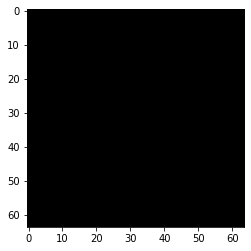

In [10]:
for i, 정답 in train_ds.take(1):
  # print(i)
  # print(정답)
  plt.imshow(i[0].numpy().astype('uint8'))
  plt.show()

사진은 0 ~ 255 숫자를 0~1 사이의 숫자로 압축시켰기 때문에 까맣게 보인다.

### **3. 모델 제작하기**

#### **3.1 모델 만들기**

In [ ]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D((2, 2)),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),    
    tf.keras.layers.Dense(1, activation='sigmoid')                             
])

칼라 사진이기 때문에 input shape 마지막 숫자가 3이다.

`tf.keras.layers.Dropout(0,2),` 윗 레이어의 20% 노드를 제거하는 레이어로 오버피팅을 방지할 수 있다.

#### **3.2 모델 컴파일하기**

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       7

### **4. 모델 학습시키기**

In [ ]:
model.fit(train_ds, validation_data = val_ds, epochs=5)

Epoch 1/5
313/313 [==============================] - 210s 663ms/step - loss: 0.6143 - accuracy: 0.6505 - val_loss: 0.5892 - val_accuracy: 0.6900
Epoch 2/5
313/313 [==============================] - 197s 629ms/step - loss: 0.5018 - accuracy: 0.7575 - val_loss: 0.5151 - val_accuracy: 0.7576
Epoch 3/5
313/313 [==============================] - 199s 635ms/step - loss: 0.4387 - accuracy: 0.7995 - val_loss: 0.4101 - val_accuracy: 0.8158
Epoch 4/5
313/313 [==============================] - 197s 627ms/step - loss: 0.3917 - accuracy: 0.8239 - val_loss: 0.3872 - val_accuracy: 0.8318
Epoch 5/5
313/313 [==============================] - 194s 618ms/step - loss: 0.3473 - accuracy: 0.8461 - val_loss: 0.3666 - val_accuracy: 0.8344
